Autor: Erick Rodríguez Martínez
Fecha: 20/Febrero/2023

# Master Universitario en Inteligencía Artificial
## Aprendizaje Automático
### Cuaderno te Ejercicios T12 - Aprendizaje Por Refuerzo
+ Un Ejemplo Sencillo

En el siguiente Notebook vamos a presentar un ejemplo muy sencillo con el que comprender como funciona el algoritmo clasico de QLearning. El objetivo de QLearning es aprender una serie de normas que le diga a un agente que acción tomar bajo que circunstancias.

El código que aquí vamos a utilizar es una adaptación del que podemos encontrar en: http://mnemstudio.org/path-finding-q-learning-tutorial.htm

# 0. Install Python Packages

In [1298]:
# Open CV - Open Source Computer Vision Library
# !pip install opencv-python

# Matplotlib - Comprehensive library for creating static, animated, and interactive visualizations in Python.
# !pip install matplotlib

# A series of OpenCV+ convenience functions that perform basics tasks
# !pip install imutils

# Mahotas - Fast computer vision algorithms (all implemented in C++ for speed) operating over numpy arrays
# !pip install mahotas

# 1. Import Python Libraries

In [1299]:
import numpy as np
import pylab as plb
import networkx as nx
import random

## 2. Set-Up

In [1300]:
# Initialize Global Variables
randomInitState = 0
goal = 7
gamma = 0.2

# 3. Definition and plotting of the Graph (Map)

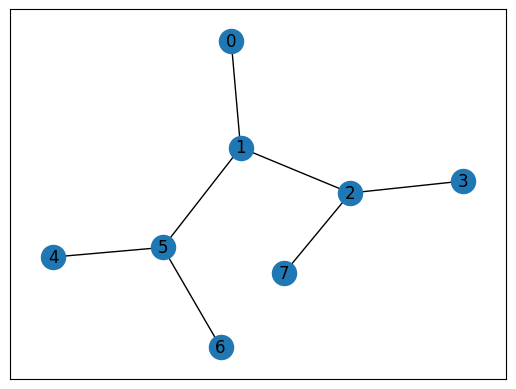

In [1301]:
mapPoints = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2), (2, 3), (2, 7)]

map = nx.Graph()
map.add_edges_from(mapPoints)
pos = nx.spring_layout(map, seed= 31)
nx.draw_networkx_nodes(map,pos)
nx.draw_networkx_edges(map,pos)
nx.draw_networkx_labels(map,pos)
plb.show()

# 4. Build the Reward Matrix
## 4.1 Build Reward Matrix and set the Reward Values of the entire matrix to -1 as a first step
##### In the future, when we see a value of -1, it'll mean that it's not a valid option to be chosen.

In [1302]:
matrixSize = len(mapPoints) + 1
matrixRewards = np.matrix(np.ones((matrixSize, matrixSize)))
matrixRewards *= -1
print(matrixRewards)

[[-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]]


## 4.2 Populate in the Reward Matrix with 0's and 100's depending on whether the points are Paths or Goals respectively
##### Consider points as bidirectional paths, which means that a connection X -> Y (X, Y) should also be checked as Y -> X (Y, X), unless it is a target, in which case it should only be considered as a one-way path because we wouldn't like to go back if we have already reached a target position and we're not supposed to start from a Goal Position such as "G -> Y (G, Y) or Y -> G (Y,G)"
* Paths -> Reward = 0
* Goals -> Reward = 100
* Invalid Position -> Reward = Remains to -1

In [1303]:
goal = 7

for point in mapPoints:
    if point[1] == goal:
        matrixRewards[point] = 100
    else:
        matrixRewards[point] = 0
    if point[0] == goal:
        matrixRewards[point[::-1]] = 100
    else:
        matrixRewards[point[::-1]] = 0

print(matrixRewards)

[[ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.  -1.   0.  -1.  -1.  -1. 100.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]]


# 5. Build Q Matrix

In [1304]:
Q = np.zeros_like(matrixRewards)
print(Q)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


La fórmula que utiliza QLearning para transicionar es muy sencilla
Q(state action) = R(state action) + gamma * (Q(nextState allActions)
$Q(state, nextstate) = R(state, next state) + gamma*max[Q(next state, all third states)]$
Gamma debe ser un valor entre 0 y 1. Si Gamma está más cerca de cero el agente tendera a considerar solo recompensas inmediatas Si Gamma está más cerca de uno, el agente considerará recompensas futuras con mayor peso dispuesto a retrasar las recompensas

# 6. [Step By Step] - Training
## 6.1 Select a Random Init State

In [1305]:
while (randomInitState == 0) or (randomInitState == goal):
    randomInitState = np.random.randint(len(mapPoints))

state = randomInitState
print(state)

randomInitState = 0

1


## 6.2. Select one among all possible actions (Next State) for the Current State

In [1306]:
# Check all possible next states options
# {k for k, v in <dict>.items() if v == value} - Returns set of keys that point to the value.
nextStateOptions = [__ for __, option in enumerate(np.nditer(matrixRewards[state])) if option >= 0]

print(matrixRewards[state])
print(nextStateOptions)

[[ 0. -1.  0. -1. -1.  0. -1. -1.]]
[0, 2, 5]


In [1307]:
# Make a random choice of next state
nextState = random.choice(nextStateOptions)
print(nextState)

0


## 6.3. Training Section
### 6.3.1 Compute $Q(state, nextstate) = R(state, next state) + gamma*max[Q(next state, all third states)]$


In [1308]:
print(Q[state, nextState])
print(matrixRewards[state, nextState])
print(gamma)
print(Q[nextState])
print(Q[nextState].argmax())


0.0
0.0
0.2
[[0. 0. 0. 0. 0. 0. 0. 0.]]
0


In [1309]:
Q[state, nextState] = matrixRewards[state, nextState] + gamma * Q[nextState].argmax()
print(Q)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [1310]:
state = nextState
print(state)

0


### 6.3.2 Check if goal has been reached

In [1311]:
if state == goal:
    print('Goal has been reached')
else:
    print('Goal has not been reached')

Goal has not been reached


# 7. [Straight Forward] - Training

In [ ]:
def
while (randomInitState == 0) or (randomInitState == goal):
    randomInitState = np.random.randint(len(mapPoints))

state = randomInitState
print(state)

randomInitState = 0

In [1312]:
score = []
numberEpisodes = 700

for __ in range(numberEpisodes):



SyntaxError: invalid syntax (455826207.py, line 4)